In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Project_big_data/data'

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/My pc/Downloads/BigDataGitProject/Insuranceproject/ITCS6100_training_dataset/training_data.csv')

C:\Users\My pc\AppData\Local\Temp\ipykernel_12636\1448761271.py:1: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/My pc/Downloads/BigDataGitProject/Insuranceproject/ITCS6100_training_dataset/training_data.csv')


In [3]:
df.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [4]:
print(df.shape)

(424431, 69)


In [5]:
df= df.drop_duplicates()

In [6]:
print(df.shape)

(424431, 69)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424431 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Company                            424431 non-null  object 
 2   Policy_Installment_Term                   424431 non-null  int64  
 3   Policy_Billing_Code                       424431 non-null  object 
 4   Policy_Method_Of_Payment                  424431 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424431 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424431 non-null  object 
 7   Vehicle_Territory                         424431 non-null  int64  
 8   Vehicle_Make_Year                         424431 non-null  int64  
 9   Vehicle_Make_Description                  424431 non-null  object 
 10  Vehicle_Performance 

In [10]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [11]:
num_columns = df.select_dtypes(['int64','float64']).columns
df_num = df[num_columns]

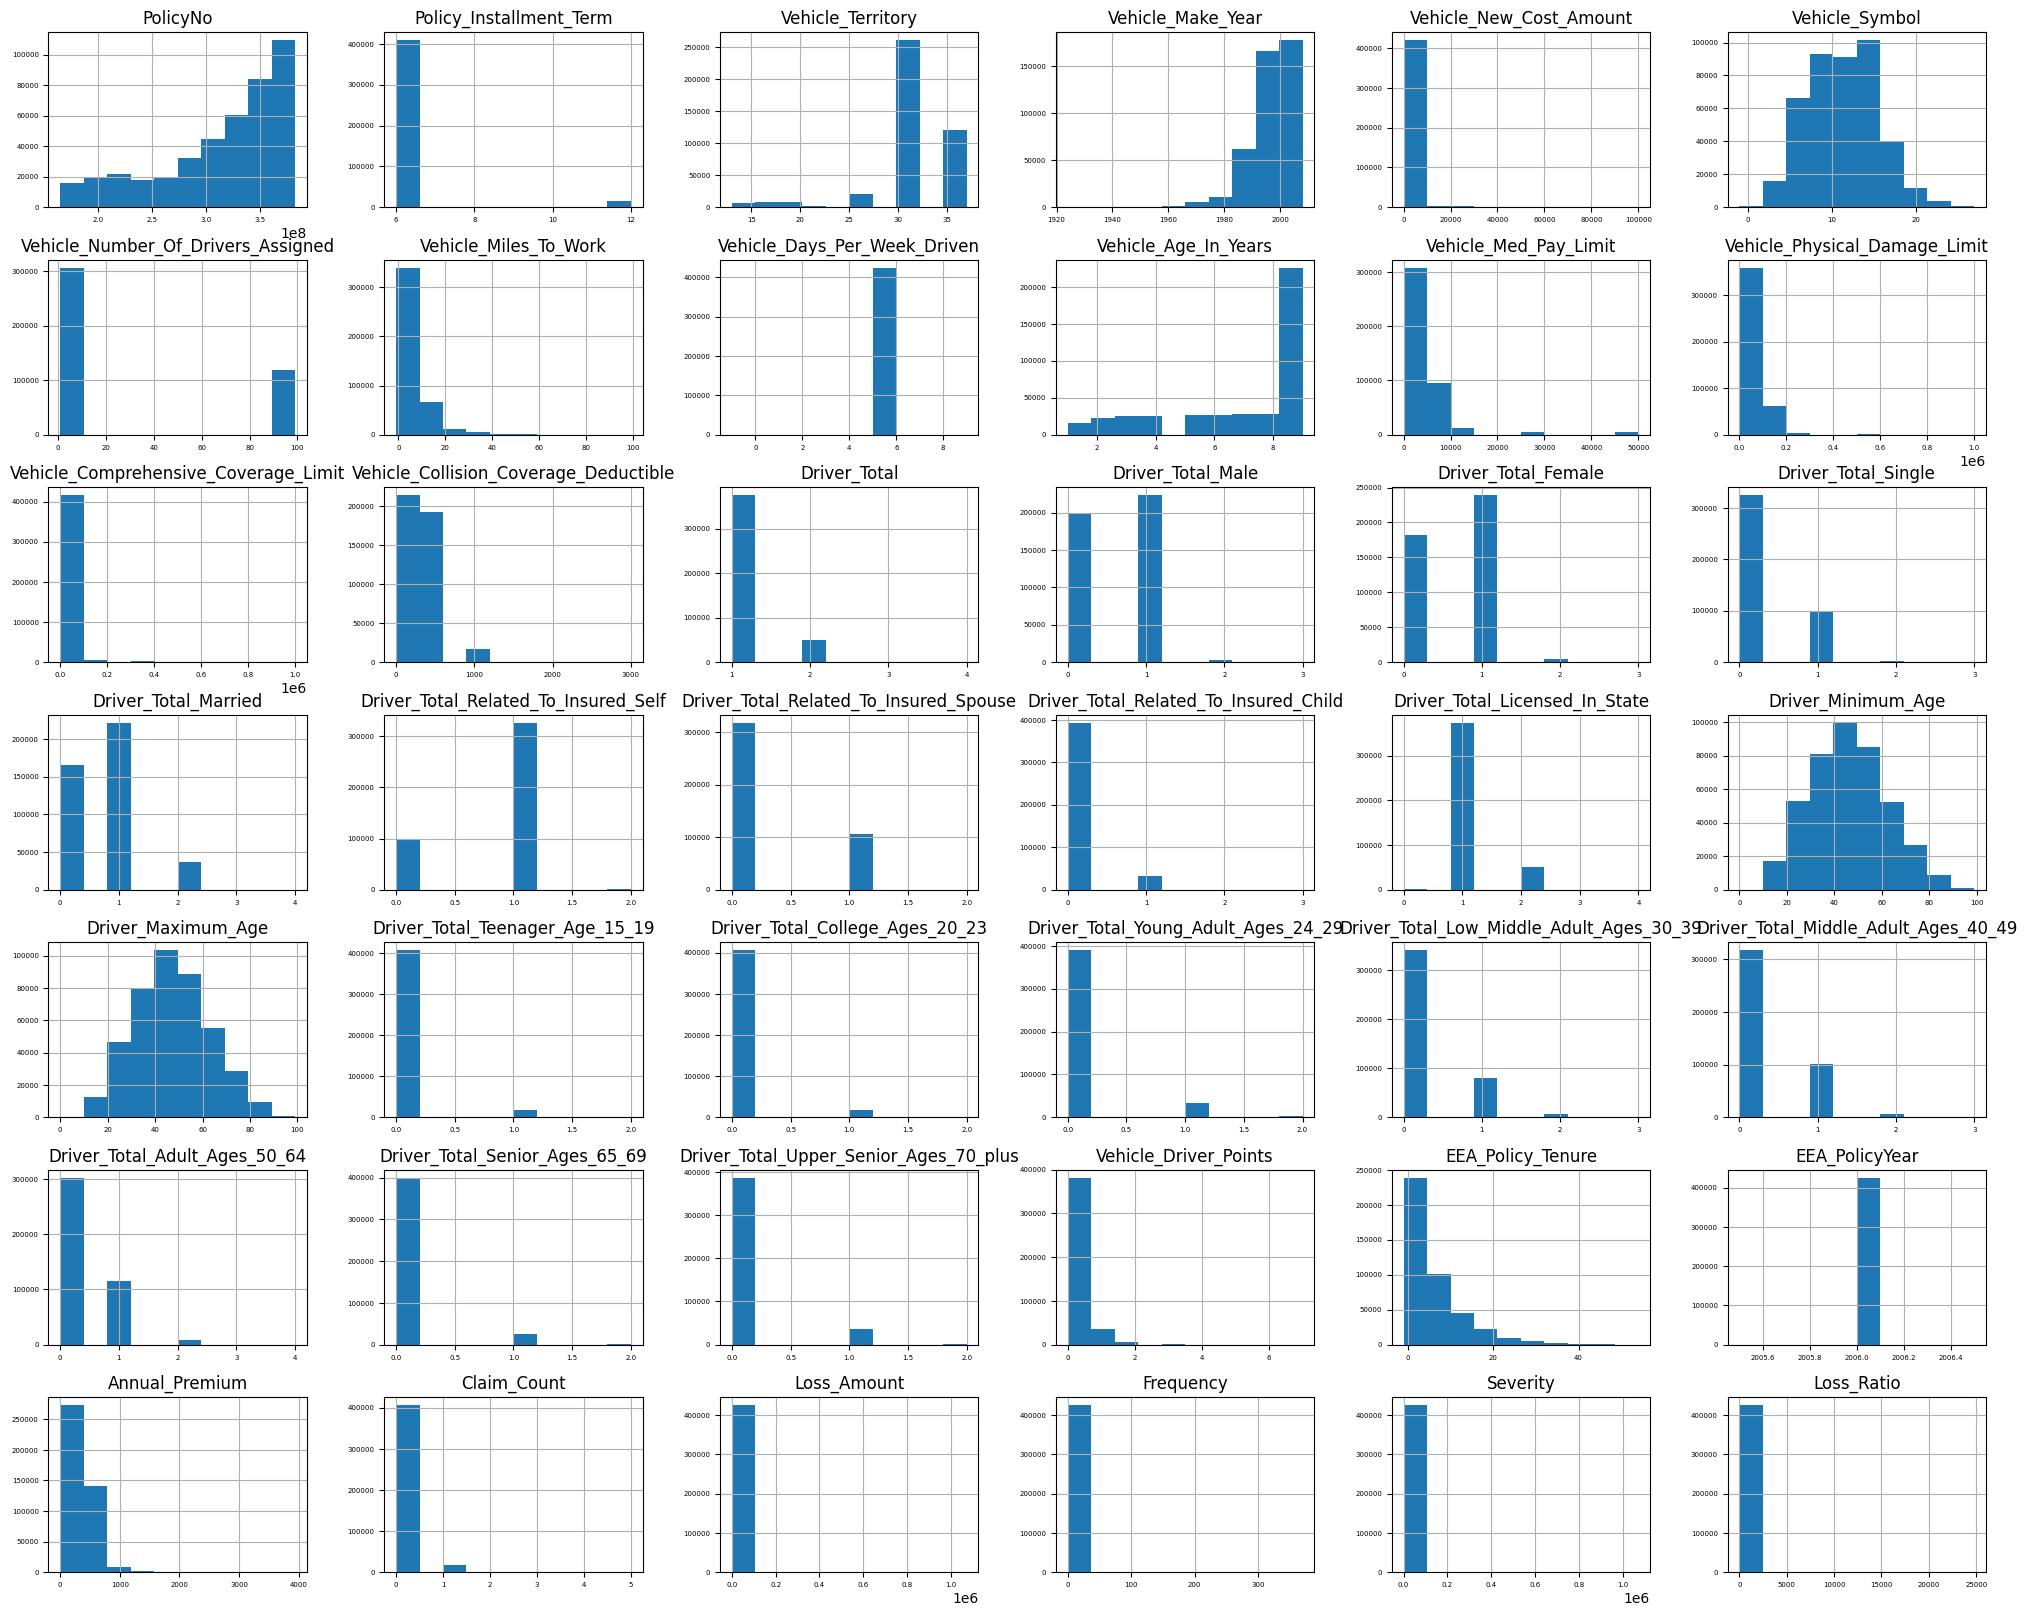

In [12]:
df_num.hist(figsize=(25, 20), bins=10, xlabelsize=5, ylabelsize=5);

In [14]:
# Find columns with null values
missing_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(missing_columns)

Columns with null values:
Index(['Vehicle_Bodily_Injury_Limit', 'EEA_Prior_Bodily_Injury_Limit'], dtype='object')


In [15]:
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
print(missing_cols)

Vehicle_Bodily_Injury_Limit      17326
EEA_Prior_Bodily_Injury_Limit    17326
dtype: int64


In [16]:
# # strip extra spaces from column values
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].str.strip()

#Replace any null or missing values in the 'Vehicle_Bodily_Injury_Limit' column with the mode
mode_value = df['Vehicle_Bodily_Injury_Limit'].mode()[0]
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].fillna(mode_value)

# Check unique values in 'Vehicle_Bodily _Injury_Limit' column
print(df['Vehicle_Bodily_Injury_Limit'])

0         250-500
1         100-300
2         250-500
3          50-100
4          50-100
           ...   
424426      25-50
424427    100-300
424428    250-500
424429     50-100
424430      25-50
Name: Vehicle_Bodily_Injury_Limit, Length: 424431, dtype: object


In [17]:
# strip extra spaces from column values
df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].str.strip()

#Replace any null or missing values in the 'EEA_Prior_Bodily_Injury_Limit' column with the mode
mode_value = df['EEA_Prior_Bodily_Injury_Limit'].mode()[0]
df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].fillna(mode_value)

# Check unique values in the 'EEA_Prior_Bodily_Injury_Limit' column
print(df['EEA_Prior_Bodily_Injury_Limit'])

0         100-400
1         100-200
2         100-400
3          40-100
4          40-100
           ...   
424426      20-50
424427    100-200
424428    100-400
424429     40-100
424430      20-50
Name: EEA_Prior_Bodily_Injury_Limit, Length: 424431, dtype: object


In [18]:
df['Vehicle_Number_Of_Drivers_Assigned'].value_counts()

1     295837
99    118544
2       9283
3        666
4         74
5         18
6          6
8          2
7          1
Name: Vehicle_Number_Of_Drivers_Assigned, dtype: int64

In [ ]:
!pip install numpy

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [20]:
# Calculate the correlation matrix using the corr() method of the DataFrame
corr_matrix =df.corr()

C:\Users\My pc\AppData\Local\Temp\ipykernel_12636\3506949811.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df.corr()


C:\Users\My pc\AppData\Local\Temp\ipykernel_12636\3012967145.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  create_mask = np.zeros_like(corr_matrix, dtype=np.bool)


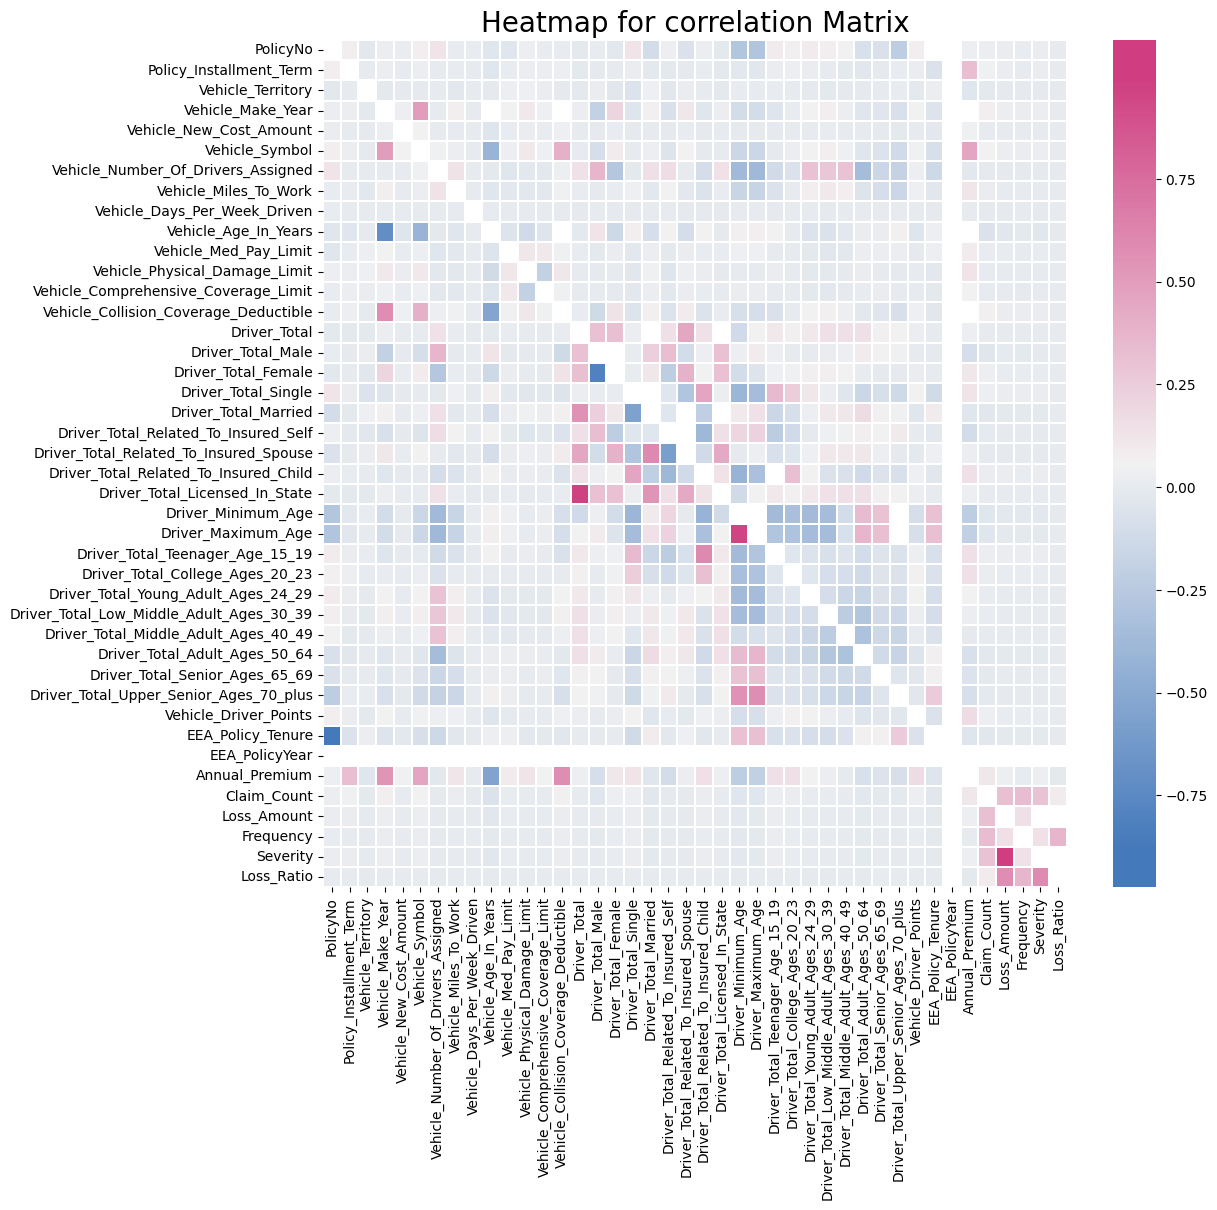

In [21]:
# Create a new figure with a specified size and add a title to the plot
fig, axis = plt.subplots(figsize=(12, 11))
plt.title("Heatmap for correlation Matrix", fontsize=20)


# Create a mask for significant values in the correlation matrix
create_mask = np.zeros_like(corr_matrix, dtype=np.bool)
create_mask[np.triu_indices_from(create_mask)] = True
create_mask[np.abs(corr_matrix) < 0.5] = False


# Create a custom color map using seaborn's diverging_palette() function
custom_map = sns.diverging_palette(250, 349, as_cmap=True)


# Use seaborn's heatmap() function to create the heatmap of the correlation matrix
sns.heatmap(corr_matrix, ax=axis, cmap=custom_map, mask=create_mask, linewidths=0.1, cbar_kws={"extend":"both", "extendfrac":0.05,"extendrect": True})


# Display the plot using matplotlib's show() method
plt.show()

In [ ]:
!pip install PrettyTable

In [22]:
from prettytable import PrettyTable

# Compute the correlation between the numeric features and the target variable 'Loss_Ratio'
df_num_correlation = df_num.corr()['Loss_Ratio'][:-1] # 1 because the latest row is Loss_Ratio

# Identify the numeric features that are strongly correlated with 'Loss_Ratio'
list_of_feature = df_num_correlation[abs(df_num_correlation) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Loss Ratio:\n{}".format(len(list_of_feature), list_of_feature))

# Compute the correlation between each individual numeric feature and ‘Loss_Ratio'
list_seperate_feature = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is Loss_Ratio
    # Create a DataFrame with the current feature and 'Loss_Ratio'
    df_new = df_num[[df_num.columns[i], 'Loss_Ratio']]
    # Remove any rows where the current feature has a value of 0
    df_new = df_new[df_new[df_num.columns[i]] != 0]
    # Add the DataFrame to a list of all individual feature correlations
    list_seperate_feature.append(df_new)

# Sort the list of individual feature correlations by correlation coefficient
correlated_features = {feature.columns[0]: feature.corr()['Loss_Ratio'][0] for feature in list_seperate_feature}
correlated_features = sorted(correlated_features.items(), key=lambda x: x[1])

# Create a table with the correlations for each individual numeric feature
pre_table = PrettyTable()
pre_table.field_names = ["Feature", "Correlation"]

for (key, value) in correlated_features:
    pre_table.add_row([key, value])

# Print the table
print(pre_table)


There are 2 strongly correlated values with Loss Ratio:
Severity       0.585348
Loss_Amount    0.578532
Name: Loss_Ratio, dtype: float64
+------------------------------------------+-------------------------+
|                 Feature                  |       Correlation       |
+------------------------------------------+-------------------------+
|              Annual_Premium              |  -0.013339920079666993  |
|   Driver_Total_Young_Adult_Ages_24_29    |  -0.007484243417789255  |
|               Claim_Count                |  -0.0061785537458779165 |
|            Vehicle_Territory             |  -0.0033056865820963754 |
|     Driver_Total_College_Ages_20_23      |  -0.002939781747480398  |
|     Driver_Total_Teenager_Age_15_19      |  -0.0026084656152449985 |
|    Vehicle_Number_Of_Drivers_Assigned    |  -0.002467253158321577  |
|  Driver_Total_Related_To_Insured_Child   |  -0.0022147828417857503 |
|            EEA_Policy_Tenure             |  -0.002064310615584465  |
|          

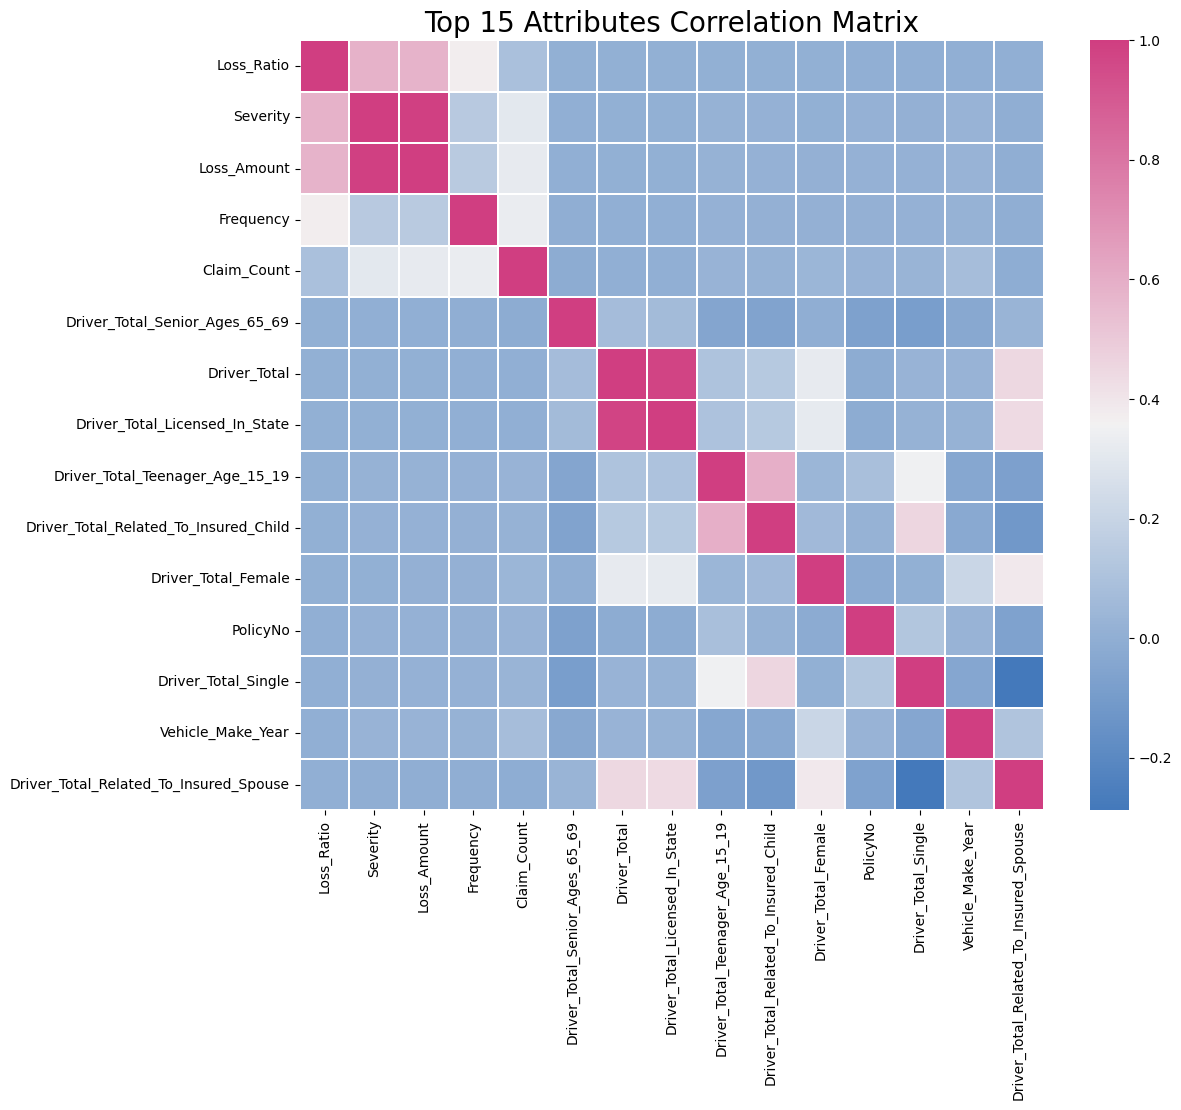

In [23]:
# Specify the number of top attributes to show in the correlation matrix
num = 15
# Select the top num attributes with the highest correlation to 'Loss_Ratio'
target_col = corr_matrix.nlargest(num, 'Loss_Ratio')['Loss_Ratio'].index

# Compute the correlation matrix for the top num attributes
compute_top = np.corrcoef(df[target_col].values.T)

# Create a new figure with a specified size
fig, axis = plt.subplots(figsize=(12, 10))

# Create a custom color map
custom_map = sns.diverging_palette(250, 349, as_cmap=True)

# Created a heatmap of the correlation matrix for the top num attributes
sns.heatmap(compute_top, ax=axis, cmap=custom_map, linewidths=0.2, yticklabels=target_col.values, xticklabels=target_col.values)

# title 
plt.title('Top {} Attributes Correlation Matrix'.format(num), fontsize=20)

# Display the plot
plt.show()

In [ ]:
# correlation_matrix =df.corr()
# f,ax = plt.subplots(figsize=(12,11))
# plt.title("Heatmap of correlation Matrix", fontsize=20)
# mask = np.zeros_like(correlation_matrix, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# mask[np.abs(correlation_matrix)<0.5] = False
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(correlation_matrix, ax=ax, cmap=cmap, mask=mask, linewidths=0.1, cbar_kws={"extend":"both", "extendfrac":0.05,"extendrect": True})
# plt.show()

In [24]:
df.isna().sum()
# pd.set_option('display.max_rows',None)
# df.isna().sum()

counts1 = df['Vehicle_Bodily_Injury_Limit'].value_counts()
counts2 = df['EEA_Prior_Bodily_Injury_Limit'].value_counts()
# Get the most common value in the column
most_common_value1 = counts1.idxmax()
most_common_value2 = counts2.idxmax()


# Fill NaN values with the most common value in the column
df['Vehicle_Bodily_Injury_Limit'].fillna(df['Vehicle_Bodily_Injury_Limit'].iloc[0], inplace=True)
#df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].fillna(most_common_value1)
df['EEA_Prior_Bodily_Injury_Limit'].fillna(df['EEA_Prior_Bodily_Injury_Limit'].iloc[0], inplace=True)
#df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].fillna(most_common_value2)


In [25]:
pd.set_option('display.max_rows',None)
df.isna().sum()

PolicyNo                                    0
Policy_Company                              0
Policy_Installment_Term                     0
Policy_Billing_Code                         0
Policy_Method_Of_Payment                    0
Policy_Reinstatement_Fee_Indicator          0
Policy_Zip_Code_Garaging_Location           0
Vehicle_Territory                           0
Vehicle_Make_Year                           0
Vehicle_Make_Description                    0
Vehicle_Performance                         0
Vehicle_New_Cost_Amount                     0
Vehicle_Symbol                              0
Vehicle_Number_Of_Drivers_Assigned          0
Vehicle_Usage                               0
Vehicle_Miles_To_Work                       0
Vehicle_Days_Per_Week_Driven                0
Vehicle_Annual_Miles                        0
Vehicle_Anti_Theft_Device                   0
Vehicle_Passive_Restraint                   0
Vehicle_Age_In_Years                        0
Vehicle_Med_Pay_Limit             

In [26]:
corr_matrix['Loss_Amount']

PolicyNo                                    0.014785
Policy_Installment_Term                     0.015728
Vehicle_Territory                          -0.005857
Vehicle_Make_Year                           0.027465
Vehicle_New_Cost_Amount                     0.000749
Vehicle_Symbol                              0.021756
Vehicle_Number_Of_Drivers_Assigned         -0.003428
Vehicle_Miles_To_Work                       0.003734
Vehicle_Days_Per_Week_Driven               -0.001793
Vehicle_Age_In_Years                       -0.028379
Vehicle_Med_Pay_Limit                       0.006681
Vehicle_Physical_Damage_Limit               0.006070
Vehicle_Comprehensive_Coverage_Limit        0.003187
Vehicle_Collision_Coverage_Deductible       0.020509
Driver_Total                                0.004486
Driver_Total_Male                          -0.006112
Driver_Total_Female                         0.008930
Driver_Total_Single                         0.014020
Driver_Total_Married                       -0.

In [27]:
columns = ['Policy_Installment_Term', 
           'Policy_Reinstatement_Fee_Indicator',
           'Vehicle_Performance',
#          'Vehicle_Territory',
           'Vehicle_Make_Year',
           'Vehicle_New_Cost_Amount',
           'Vehicle_Symbol',
           'Vehicle_Miles_To_Work',
#           'Vehicle_Number_Of_Drivers_Assigned',
#            'Vehicle_Days_Per_Week_Driven',
           'Vehicle_Passive_Restraint',
#           'Vehicle_Age_In_Years',
           'Vehicle_Med_Pay_Limit',
           'Vehicle_Bodily_Injury_Limit',
           'Vehicle_Physical_Damage_Limit',
           'Vehicle_Comprehensive_Coverage_Indicator',
           'Vehicle_Collision_Coverage_Deductible',
           'Vehicle_Collision_Coverage_Indicator',
           'Driver_Total',
#            'Driver_Total_Male',
           'Driver_Total_Female',
#           'Driver_Total_Single',
#           'Driver_Total_Married',
#            'Driver_Total_Related_To_Insured_Self',
#            'Driver_Total_Related_To_Insured_Spouse', 
           'Driver_Total_Related_To_Insured_Child',
            'Driver_Total_Licensed_In_State',
#           'Driver_Minimum_Age',
#           'Driver_Maximum_Age', 
#            'Driver_Total_Teenager_Age_15_19',
#            'Driver_Total_College_Ages_20_23',
#            'Driver_Total_Young_Adult_Ages_24_29',
#            'Driver_Total_Low_Middle_Adult_Ages_30_39',
#            'Driver_Total_Middle_Adult_Ages_40_49',
#            'Driver_Total_Adult_Ages_50_64',
#            'Driver_Total_Senior_Ages_65_69',
#            'Driver_Total_Upper_Senior_Ages_70_plus',
           'Vehicle_Driver_Points',
          'Vehicle_Youthful_Driver_Indicator',
           'Vehicle_Safe_Driver_Discount_Indicator',
#            'EEA_Policy_Tenure',
#            'EEA_PolicyYear',
           'SYS_Renewed',
           'SYS_New_Business',
           'Annual_Premium',
           'Loss_Amount'
          ]

In [28]:
df = df[columns]
df.head()

,Policy_Installment_Term,Policy_Reinstatement_Fee_Indicator,Vehicle_Performance,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Miles_To_Work,Vehicle_Passive_Restraint,Vehicle_Med_Pay_Limit,Vehicle_Bodily_Injury_Limit,...,Driver_Total_Female,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Vehicle_Driver_Points,Vehicle_Youthful_Driver_Indicator,Vehicle_Safe_Driver_Discount_Indicator,SYS_Renewed,SYS_New_Business,Annual_Premium,Loss_Amount
0,6,N,Standard,2004,-1,11,-1,Y,1000,250-500,...,1,0,1,0,N,Y,Y,N,320.12,0.0
1,6,N,Standard,1980,-1,11,-1,N,2000,100-300,...,1,0,1,0,N,Y,Y,N,259.70,0.0
2,6,N,Standard,2005,-1,10,-1,Y,50000,250-500,...,0,0,1,0,N,Y,Y,N,613.74,0.0
3,6,N,Standard,2005,-1,12,-1,Y,5000,50-100,...,0,0,1,0,N,Y,Y,N,541.66,0.0
4,6,N,Standard,2005,-1,12,-1,Y,5000,50-100,...,0,0,1,0,N,Y,Y,N,541.66,0.0


In [29]:
df.dtypes

Policy_Installment_Term                       int64
Policy_Reinstatement_Fee_Indicator           object
Vehicle_Performance                          object
Vehicle_Make_Year                             int64
Vehicle_New_Cost_Amount                       int64
Vehicle_Symbol                                int64
Vehicle_Miles_To_Work                         int64
Vehicle_Passive_Restraint                    object
Vehicle_Med_Pay_Limit                         int64
Vehicle_Bodily_Injury_Limit                  object
Vehicle_Physical_Damage_Limit                 int64
Vehicle_Comprehensive_Coverage_Indicator     object
Vehicle_Collision_Coverage_Deductible         int64
Vehicle_Collision_Coverage_Indicator         object
Driver_Total                                  int64
Driver_Total_Female                           int64
Driver_Total_Related_To_Insured_Child         int64
Driver_Total_Licensed_In_State                int64
Vehicle_Driver_Points                         int64
Vehicle_Yout

In [30]:
df.replace('Unknown', np.NaN, inplace=True)
df['Vehicle_Med_Pay_Limit'].replace(-1,np.NaN,inplace=True)
df['Vehicle_Physical_Damage_Limit'].replace(-1,np.NaN,inplace=True)
df['Vehicle_Bodily_Injury_Limit'].replace('NA', np.NaN, inplace=True)

In [31]:
df['Vehicle_Med_Pay_Limit'].fillna(df['Vehicle_Med_Pay_Limit'].median(), inplace=True)

In [32]:
df.dropna(subset=['Vehicle_Physical_Damage_Limit'], inplace=True)

In [33]:
categorical_columns = ['Policy_Reinstatement_Fee_Indicator', 'Vehicle_Performance', 'Vehicle_Passive_Restraint',
                       'Vehicle_Bodily_Injury_Limit',
                       'Vehicle_Comprehensive_Coverage_Indicator',
                       'Vehicle_Collision_Coverage_Indicator',
                       'Vehicle_Youthful_Driver_Indicator',
                       'Vehicle_Safe_Driver_Discount_Indicator',
                       'SYS_Renewed',
                       'SYS_New_Business'
                      ]

In [34]:
df = pd.get_dummies(df, columns=categorical_columns, prefix_sep="_")

In [194]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

#df[outliers] = df.median()
#import numpy as np
#z_scores = (df - np.mean(df)) / np.std(df)
#threshold = 3


In [35]:
pd.set_option('display.max_columns', None)
df.head(40)

,Policy_Installment_Term,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Miles_To_Work,Vehicle_Med_Pay_Limit,Vehicle_Physical_Damage_Limit,Vehicle_Collision_Coverage_Deductible,Driver_Total,Driver_Total_Female,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Vehicle_Driver_Points,Annual_Premium,Loss_Amount,Policy_Reinstatement_Fee_Indicator_N,Policy_Reinstatement_Fee_Indicator_Y,Vehicle_Performance_High,Vehicle_Performance_Intermediate,Vehicle_Performance_Sports,Vehicle_Performance_Sports Premium,Vehicle_Performance_Standard,Vehicle_Passive_Restraint_N,Vehicle_Passive_Restraint_Y,Vehicle_Bodily_Injury_Limit_100-300,Vehicle_Bodily_Injury_Limit_100-500,Vehicle_Bodily_Injury_Limit_1M-1M,Vehicle_Bodily_Injury_Limit_25-50,Vehicle_Bodily_Injury_Limit_250-500,Vehicle_Bodily_Injury_Limit_300-500,Vehicle_Bodily_Injury_Limit_50-100,Vehicle_Bodily_Injury_Limit_500-500,Vehicle_Comprehensive_Coverage_Indicator_N,Vehicle_Collision_Coverage_Indicator_N,Vehicle_Collision_Coverage_Indicator_Y,Vehicle_Youthful_Driver_Indicator_N,Vehicle_Youthful_Driver_Indicator_Y,Vehicle_Safe_Driver_Discount_Indicator_N,Vehicle_Safe_Driver_Discount_Indicator_Y,SYS_Renewed_N,SYS_Renewed_Y,SYS_New_Business_N,SYS_New_Business_Y
0,6,2004,-1,11,-1,1000.0,100000.0,500,1,1,0,1,0,320.12,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0
1,6,1980,-1,11,-1,2000.0,50000.0,50,1,1,0,1,0,259.70,0.0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
2,6,2005,-1,10,-1,50000.0,100000.0,100,1,0,0,1,0,613.74,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0
3,6,2005,-1,12,-1,5000.0,35000.0,250,1,0,0,1,0,541.66,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0
4,6,2005,-1,12,-1,5000.0,35000.0,250,1,0,0,1,0,541.66,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0
5,6,1985,-1,7,10,5000.0,25000.0,-1,1,1,0,1,0,164.30,0.0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0
7,6,2005,-1,16,-1,1000.0,100000.0,1000,2,1,0,2,0,336.02,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0
8,6,1991,-1,12,-1,1000.0,50000.0,-1,1,0,0,1,0,103.88,0.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0
9,6,2005,-1,15,-1,1000.0,50000.0,500,1,0,0,1,0,505.62,0.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
10,6,2001,-1,8,12,1000.0,25000.0,250,1,1,0,1,0,390.08,0.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0


In [36]:
df.isnull().sum()

Policy_Installment_Term                       0
Vehicle_Make_Year                             0
Vehicle_New_Cost_Amount                       0
Vehicle_Symbol                                0
Vehicle_Miles_To_Work                         0
Vehicle_Med_Pay_Limit                         0
Vehicle_Physical_Damage_Limit                 0
Vehicle_Collision_Coverage_Deductible         0
Driver_Total                                  0
Driver_Total_Female                           0
Driver_Total_Related_To_Insured_Child         0
Driver_Total_Licensed_In_State                0
Vehicle_Driver_Points                         0
Annual_Premium                                0
Loss_Amount                                   0
Policy_Reinstatement_Fee_Indicator_N          0
Policy_Reinstatement_Fee_Indicator_Y          0
Vehicle_Performance_High                      0
Vehicle_Performance_Intermediate              0
Vehicle_Performance_Sports                    0
Vehicle_Performance_Sports Premium      

Training Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
X = df.drop(['Loss_Amount'],axis=1)
Y = df['Loss_Amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#model = LinearRegression()
#model = Ridge(alpha=0.1)
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, Y_train)

Ytrain_predict = model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, Ytrain_predict)))
mae = mean_absolute_error(Y_train, Ytrain_predict)
r2 = r2_score(Y_train, Ytrain_predict)

print("Model performance for the training set")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")


Ytest_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Ytest_predict)))
mae = mean_absolute_error(Y_test, Ytest_predict)

# r-squared score of the model
r2 = r2_score(Y_test, Ytest_predict)

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))

Model performance for the training set
RMSE is 1431.9179487279332
MAE is 203.47318177897432
R2 score is 0.8364204938338367


The model performance for testing set
RMSE is 2942.5505661763236
MAE is 519.8407273382456
R2 score is -0.16224059652517364


In [188]:
# Linear Regression
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# X = df.drop('Loss_Amount', axis=1)
# y = df['Loss_Amount']

# #Create numpy array with the features and target 
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean squared error:", mse)
# rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))
# print("Root mean squared error:", rmse)
# mae = mean_absolute_error(y_train, y_pred)
# print("Mean absolute error:", mae)
# r2 = r2_score(y_train, y_pred)
# print("r2_score:", r2)

Testing Model

In [38]:
from os import listdir
from os.path import isfile, join

mypath = 'C:/Users/My pc/Downloads/BigDataGitProject/Insuranceproject/testing_portfolios'
portfolios = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [39]:
pred = []
for index, portfolio in enumerate(portfolios):
    df_test = pd.read_csv(mypath+'/'+portfolio)
    df_test = df_test[columns[:len(columns) - 1]]
    df_test = pd.get_dummies(df_test, columns=categorical_columns, prefix_sep="_")

    # Remove additional columns
    for col in df_test.columns:
        if col not in df.columns and col != 'Loss_Amount':
#             print("Removing additional feature {}".format(col))
            df_test.drop(col, axis=1, inplace=True)

    # Adding the extra columns in test data which are present in training dataset.
    for col in df.columns:
        if col not in df_test.columns and col != 'Loss_Amount':
#             print("Adding missing feature {}".format(col))
            df_test[col] = 0

    # re-ordering the columns in testing dataset as per the training dataset.
    cols = []
    for col in df.columns.tolist():
        if col != 'Loss_Amount':
            cols.append(col)
    df_test = df_test[cols]

    predicted_values = model.predict(df_test)
    final_values = np.log(sum(predicted_values)/sum(df_test['Annual_Premium']))
    pred.append(final_values)

portfolios = [folio.replace('test_', '') for folio in portfolios]
portfolios = [folio.replace('.csv', '') for folio in portfolios]
data = {'ID': portfolios, 'ln_LR': pred}
df_new = pd.DataFrame(data)
print(df_new)

excel_exported = df_new.to_csv (r'ln_lr.csv', index = None, header=True)

                ID     ln_LR
0      portfolio_1 -0.116825
1     portfolio_10 -0.120176
2     portfolio_11 -0.040215
3    portfolio_111 -0.053562
4    portfolio_112 -0.083064
5    portfolio_113 -0.153181
6    portfolio_114 -0.245006
7    portfolio_115 -0.127490
8    portfolio_116 -0.049351
9    portfolio_117 -0.157102
10   portfolio_118  0.064430
11   portfolio_119 -0.092690
12    portfolio_12 -0.175514
13   portfolio_120 -0.094488
14    portfolio_13 -0.037292
15   portfolio_131 -0.059375
16   portfolio_132 -0.215553
17   portfolio_133 -0.063083
18   portfolio_134 -0.018639
19   portfolio_135 -0.054508
20   portfolio_136 -0.196291
21   portfolio_137 -0.068385
22   portfolio_138 -0.129755
23   portfolio_139 -0.161582
24    portfolio_14 -0.213875
25   portfolio_140 -0.077741
26    portfolio_15  0.022487
27   portfolio_151 -0.132105
28   portfolio_152 -0.054369
29   portfolio_153  0.122060
30   portfolio_154  0.122734
31   portfolio_155  0.005589
32   portfolio_156 -0.190311
33   portfolio

In [ ]:

# import pandas as pd
# import glob

# # Define the directory path where the CSV files are located
# path = '/content/gdrive/MyDrive/Colab Notebooks/Project_big_data/data/testing_portfolios'

# # Use glob to get a list of all CSV files in the directory
# all_files = glob.glob(path + "/*.csv")

# # Initialize an empty list to store the dataframes
# dfs = []

# # Loop through all CSV files and append the dataframes to the list
# for filename in all_files:
#     df1 = pd.read_csv(filename, index_col=None, header=0)
#     dfs.append(df1)

# # Concatenate all dataframes into a single dataframe
# df_test = pd.concat(dfs, axis=0, ignore_index=True)